In [43]:
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [44]:
words = [w.strip() for w in open("../names.txt").readlines()]
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [45]:
alphabet = ["."] + list("abcdefghijklmnopqrstuvwxyz")
stoi = {c: i for i, c in enumerate(alphabet)}
itos = {i: c for i, c in enumerate(alphabet)}

In [46]:
# create the training set of all the bigrams (x, y)
xs, ys = [], []

for w in words[:1]:
    chs = ["."] + list(w) + ["."]
    for c1, c2 in zip(chs, chs[1:]):
        i1 = stoi[c1]
        i2 = stoi[c2]
        xs.append(i1)
        ys.append(i2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [47]:
xs

tensor([ 0,  5, 13, 13,  1])

In [48]:
ys

tensor([ 5, 13, 13,  1,  0])

In [49]:
# one hot encode the inputs

xenc = F.one_hot(xs, num_classes=27).float()

In [50]:
xenc.shape

torch.Size([5, 27])

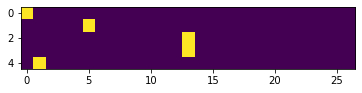

In [51]:
plt.imshow(xenc)

In [62]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)
xenc @ W

tensor([[ 1.5674e+00, -2.3729e-01, -2.7385e-02, -1.1008e+00,  2.8588e-01,
         -2.9643e-02, -1.5471e+00,  6.0489e-01,  7.9136e-02,  9.0462e-01,
         -4.7125e-01,  7.8682e-01, -3.2843e-01, -4.3297e-01,  1.3729e+00,
          2.9334e+00,  1.5618e+00, -1.6261e+00,  6.7716e-01, -8.4039e-01,
          9.8488e-01, -1.4837e-01, -1.4795e+00,  4.4830e-01, -7.0730e-02,
          2.4968e+00,  2.4448e+00],
        [ 4.7236e-01,  1.4830e+00,  3.1748e-01,  1.0588e+00,  2.3982e+00,
          4.6827e-01, -6.5650e-01,  6.1662e-01, -6.2197e-01,  5.1007e-01,
          1.3563e+00,  2.3445e-01, -4.5585e-01, -1.3132e-03, -5.1161e-01,
          5.5570e-01,  4.7458e-01, -1.3867e+00,  1.6229e+00,  1.7197e-01,
          9.8846e-01,  5.0657e-01,  1.0198e+00, -1.9062e+00, -4.2753e-01,
         -2.1259e+00,  9.6041e-01],
        [ 1.9359e-01,  1.0532e+00,  6.3393e-01,  2.5786e-01,  9.6408e-01,
         -2.4855e-01,  2.4756e-02, -3.0404e-02,  1.5622e+00, -4.4852e-01,
         -1.2345e+00,  1.1220e+00, -6.73

In [63]:
logits = (xenc @ W)
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
         0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
         0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
        [0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
         0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
         0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0150, 0.0086,

In [64]:
nlls = torch.zeros(5)
for i in range(5):
    x = xs[i].item()
    y = ys[i].item()
    print("---------------")
    print(f"bigram example {i + 1}: {itos[x]}{itos[y]} (indexes {x}, {y})")
    print(f"input to the neural net: {x}")
    print(f"output probabilities from the neural net: {probs[i]}")
    print(f"label (actual next character): {y}")
    p = probs[i, y]
    print(f"probability assigned by the net to the correct character: {p.item()}")
    logp = torch.log(p)
    print(f"log likelihood: {logp.item()}")
    nll = -logp
    print(f"negative log likelihood: {nll}")
    nlls[i] = nll

print("================")
print(f"average negative log likelihood, i.e. loss = {nlls.mean().item()}")

---------------
bigram example 1: .e (indexes 0, 5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
       grad_fn=<SelectBackward0>)
label (actual next character): 5
probability assigned by the net to the correct character: 0.01228625513613224
log likelihood: -4.399273872375488
negative log likelihood: 4.399273872375488
---------------
bigram example 2: em (indexes 5, 13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472],
       grad_fn=<SelectBackward0>)
label (actual next

In [65]:
torch.arange(5)

tensor([0, 1, 2, 3, 4])

In [66]:
loss = -probs[torch.arange(5), ys].log().mean()
loss

tensor(3.7693, grad_fn=<NegBackward0>)

# Final

In [85]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)
xenc = F.one_hot(xs, num_classes=27).float()

In [86]:
logits = xenc @ W
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True) # this is softmax
loss = -probs[torch.arange(5), ys].log().mean() 
loss

tensor(3.7693, grad_fn=<NegBackward0>)

In [87]:
# backward pass
W.grad = None # set to zero, more efficient than 0

loss.backward()

In [88]:
# update params
W.data += -0.1 * W.grad

# From the beginning

In [89]:
words = [w.strip() for w in open("../names.txt").readlines()]

In [90]:
alphabet = ["."] + list("abcdefghijklmnopqrstuvwxyz")
stoi = {c: i for i, c in enumerate(alphabet)}
itos = {i: c for i, c in enumerate(alphabet)}

In [132]:
# create the training set of all the bigrams (x, y)
xs, ys = [], []

for w in words:
    chs = ["."] + list(w) + ["."]
    for c1, c2 in zip(chs, chs[1:]):
        i1 = stoi[c1]
        i2 = stoi[c2]
        xs.append(i1)
        ys.append(i2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
num

228146

In [133]:
xenc = F.one_hot(xs, num_classes=27).float()

In [155]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [156]:
for i in range(200):
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdim=True) # this is softmax
    loss = -probs[torch.arange(num), ys].log().mean() + 0.01 * (W ** 2).mean() # negative log likelihood with regularization
    # making the regularization parameter large will yield a more uniform W
    if (i + 1) % 20 == 0:
        print(loss.item())

    # backward pass
    W.grad = None # set to zero, more efficient than 0

    loss.backward()

    # update params
    W.data += -50 * W.grad # for this model a very large learning rate seems to work

# remember the bigram base model had loss of 2.35
    

2.5886809825897217
2.522773265838623
2.503295660018921
2.494736433029175
2.4901304244995117
2.487379312515259
2.485621929168701
2.4844377040863037
2.4836044311523438
2.4829962253570557


In [157]:
probs.shape

torch.Size([228146, 27])

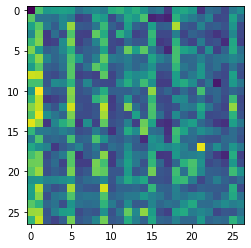

In [158]:
plt.imshow(W.detach())

In [163]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0
    while True:
        
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W
        counts = logits.exp()
        probs = counts / counts.sum(1, keepdim=True) # this is softmax


        ix = torch.multinomial(probs, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print("".join(out))

mor.
axx.
minaymoryles.
kondmaisah.
anchshizarie.
